# Importing the necessary libraries

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the dataset

In [2]:
df = pd.read_csv('finance1.csv', encoding = 'latin-1')

# Showing the data and some info

In [3]:
df

,Project Code,Title,Commitment in U.A,Country,Starting Date,Status,Source of Financing,Sector,Sovereign
0,P-MG-H00-002,Madagascar - Industrialisation and Financial S...,"12,080,000.00",Madagascar,28 Oct 2020,Approved,African Development Fund,Finance,Sovereign
1,P-Z1-H00-063,Multinational - Domestic debt markets developm...,"1,500,000.00",Multinational,13 Oct 2020,Implementation,Fragile States Facility,Finance,Sovereign
2,P-MG-HAZ-001,Madagascar - SME Business Linkages Program,"1,000,000.00",Madagascar,15 May 2020,Implementation,Fragile States Facility,Finance,Sovereign
3,P-MU-H00-004,Mauritius - Stock Exchange Mauritius (SEM) Pro...,"430,000.00",Mauritius,27 Apr 2020,Implementation,Middle Income Countries Fund,Finance,Sovereign
4,P-AO-HAB-009,Angola - Line of Credit to « Banco Millennium ...,"23,415,605.04",Angola,15 Apr 2020,Approved,African Development Bank,Finance,Non Sovereign
...,...,...,...,...,...,...,...,...,...
350,P-MA-HAA-001,1ère Ligne de Crédit à la Banque Nationale pou...,"3,912,222.92",Morocco,08 May 1974,Completion,African Development Bank,Finance,Sovereign
351,P-MW-HA0-001,Malawi Development Corporation,"1,485,997.20",Malawi,22 Nov 1972,Completion,African Development Bank,Finance,Sovereign
352,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
353,African Development Bank Group,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IATI Data Portal


# Preprocessing the Data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 355 entries, 0 to 354
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Project Code         337 non-null    object
 1   Title                336 non-null    object
 2   Commitment in U.A    336 non-null    object
 3   Country              336 non-null    object
 4   Starting Date        336 non-null    object
 5   Status               336 non-null    object
 6   Source of Financing  336 non-null    object
 7   Sector               336 non-null    object
 8   Sovereign            281 non-null    object
dtypes: object(9)
memory usage: 25.1+ KB


In [5]:
#Checking the duplicated values
df.duplicated().sum()

17

In [6]:
#knowing how many NAN or missing values
df.isna().sum()

Project Code           18
Title                  19
Commitment in U.A      19
Country                19
Starting Date          19
Status                 19
Source of Financing    19
Sector                 19
Sovereign              74
dtype: int64

# Cleaning the data

In [7]:
#droping the NAN values
df.dropna(inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 280 entries, 0 to 351
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Project Code         280 non-null    object
 1   Title                280 non-null    object
 2   Commitment in U.A    280 non-null    object
 3   Country              280 non-null    object
 4   Starting Date        280 non-null    object
 5   Status               280 non-null    object
 6   Source of Financing  280 non-null    object
 7   Sector               280 non-null    object
 8   Sovereign            280 non-null    object
dtypes: object(9)
memory usage: 21.9+ KB


In [9]:
#droping the duplicates
df.drop_duplicates(inplace=True)

In [10]:
df.duplicated().sum()

0

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 280 entries, 0 to 351
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Project Code         280 non-null    object
 1   Title                280 non-null    object
 2   Commitment in U.A    280 non-null    object
 3   Country              280 non-null    object
 4   Starting Date        280 non-null    object
 5   Status               280 non-null    object
 6   Source of Financing  280 non-null    object
 7   Sector               280 non-null    object
 8   Sovereign            280 non-null    object
dtypes: object(9)
memory usage: 21.9+ KB


**We notice that the Starting date data type is object not dateTime so we will change it**

In [12]:
df['Starting Date'] = pd.to_datetime(df['Starting Date'])

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 280 entries, 0 to 351
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Project Code         280 non-null    object        
 1   Title                280 non-null    object        
 2   Commitment in U.A    280 non-null    object        
 3   Country              280 non-null    object        
 4   Starting Date        280 non-null    datetime64[ns]
 5   Status               280 non-null    object        
 6   Source of Financing  280 non-null    object        
 7   Sector               280 non-null    object        
 8   Sovereign            280 non-null    object        
dtypes: datetime64[ns](1), object(8)
memory usage: 21.9+ KB


In [14]:
# Creating a new column to show the date by the year
df['starting_year'] = df['Starting Date'].dt.year

In [15]:
df

,Project Code,Title,Commitment in U.A,Country,Starting Date,Status,Source of Financing,Sector,Sovereign,starting_year
0,P-MG-H00-002,Madagascar - Industrialisation and Financial S...,"12,080,000.00",Madagascar,2020-10-28,Approved,African Development Fund,Finance,Sovereign,2020
1,P-Z1-H00-063,Multinational - Domestic debt markets developm...,"1,500,000.00",Multinational,2020-10-13,Implementation,Fragile States Facility,Finance,Sovereign,2020
2,P-MG-HAZ-001,Madagascar - SME Business Linkages Program,"1,000,000.00",Madagascar,2020-05-15,Implementation,Fragile States Facility,Finance,Sovereign,2020
3,P-MU-H00-004,Mauritius - Stock Exchange Mauritius (SEM) Pro...,"430,000.00",Mauritius,2020-04-27,Implementation,Middle Income Countries Fund,Finance,Sovereign,2020
4,P-AO-HAB-009,Angola - Line of Credit to « Banco Millennium ...,"23,415,605.04",Angola,2020-04-15,Approved,African Development Bank,Finance,Non Sovereign,2020
...,...,...,...,...,...,...,...,...,...,...
346,P-MA-HAA-002,Deuxième Ligne de Crédit à Banque Nationale po...,"2,851,738.40",Morocco,1976-07-16,Completion,African Development Bank,Finance,Sovereign,1976
347,P-TN-HA0-001,1ere Ligne de Crédit à la Banque de développem...,"3,000,000.00",Tunisia,1976-07-16,Completion,African Development Bank,Finance,Sovereign,1976
349,P-BI-H00-001,Ligne de Crédit,"3,975,264.91",Burundi,1974-11-21,Completion,African Development Bank,Finance,Sovereign,1974
350,P-MA-HAA-001,1ère Ligne de Crédit à la Banque Nationale pou...,"3,912,222.92",Morocco,1974-05-08,Completion,African Development Bank,Finance,Sovereign,1974


# Analysis and Visualization

**We will focus on data with date = 2019**

In [16]:
df2 = df[df['starting_year'] == 2019]

In [17]:
# Showing all the data with starting date = 2019
df2

,Project Code,Title,Commitment in U.A,Country,Starting Date,Status,Source of Financing,Sector,Sovereign,starting_year
10,P-ML-HZ0-001,Mali - African Trade Insurance Agency (ATI): C...,"7,290,000.00",Mali,2019-12-05,Approved,African Development Fund,Finance,Sovereign,2019
11,P-KE-HAB-030,Kenya - Equity Group Holdings Plc,"73,173,765.74",Kenya,2019-11-28,Approved,African Development Bank,Finance,Non Sovereign,2019
12,P-MA-HAA-012,"Morocco - ""Fonds dEquipement Communal (FEC)""","79,781,717.22",Morocco,2019-11-28,Approved,African Development Bank,Finance,Non Sovereign,2019
13,P-Z1-HB0-064,Multinational  Project for Digitisation of Go...,"1,258,000.00",Multinational,2019-11-25,Implementation,Fragile States Facility,Finance,Sovereign,2019
14,P-Z1-HB0-071,SIERRA LEONE - Government Payments Digitizatio...,"279,000.00",Multinational,2019-11-25,Approved,Fragile States Facility,Finance,Sovereign,2019
15,P-Z1-HB0-072,GOVERNMENT PAYMENTS (P2G & G2P) DIGITIZATION I...,"463,000.00",Multinational,2019-11-25,Approved,Fragile States Facility,Finance,Sovereign,2019
16,P-Z1-H00-072,Multinational - Projet dAppui au Démarrage du...,"783,328.00",Multinational,2019-11-21,Approved,Middle Income Countries Fund,Finance,Sovereign,2019
17,P-GN-HA0-001,Guinea - Vista Bank - Africa SME Programme,"5,853,901.26",Guinea,2019-09-24,Approved,African Development Bank,Finance,Non Sovereign,2019
18,P-SN-HA0-002,Sénégal - Banque Nationale pour le Développeme...,"11,967,257.58",Senegal,2019-09-24,Approved,African Development Bank,Finance,Non Sovereign,2019
20,P-KE-HAB-026,Kenya - Credit Bank PLC (CBP),"5,666,565.14",Kenya,2019-07-17,Approved,African Development Bank,Finance,Non Sovereign,2019


In [18]:
# removing the unnecessary columns
df2 = df2.drop(['Project Code', 'Title', 'Starting Date', 'Status', 'Source of Financing', 'Sector', 'Sovereign'], axis=1)

In [19]:
# Data after removing the columns
df2

,Commitment in U.A,Country,starting_year
10,"7,290,000.00",Mali,2019
11,"73,173,765.74",Kenya,2019
12,"79,781,717.22",Morocco,2019
13,"1,258,000.00",Multinational,2019
14,"279,000.00",Multinational,2019
15,"463,000.00",Multinational,2019
16,"783,328.00",Multinational,2019
17,"5,853,901.26",Guinea,2019
18,"11,967,257.58",Senegal,2019
20,"5,666,565.14",Kenya,2019


In [22]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26 entries, 10 to 36
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Commitment in U.A  26 non-null     object
 1   Country            26 non-null     object
 2   starting_year      26 non-null     int32 
dtypes: int32(1), object(2)
memory usage: 728.0+ bytes


**We can notice that the Commitment in U.A data type is object not numerical**

In [23]:
# Changing the column data type to numeric
df2['Commitment in U.A'] = df2['Commitment in U.A'].str.replace(r',', '')
df2['Commitment in U.A'] = df2['Commitment in U.A'].apply(pd.to_numeric)

In [24]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26 entries, 10 to 36
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Commitment in U.A  26 non-null     float64
 1   Country            26 non-null     object 
 2   starting_year      26 non-null     int32  
dtypes: float64(1), int32(1), object(1)
memory usage: 728.0+ bytes


In [25]:
# Getting the number of each country with Commitment in U.A in data
df2['Country'].value_counts().reset_index()

,Country,count
0,Multinational,10
1,Tunisia,4
2,Kenya,3
3,Mali,1
4,Morocco,1
5,Guinea,1
6,Senegal,1
7,Rwanda,1
8,Mozambique,1
9,Madagascar,1


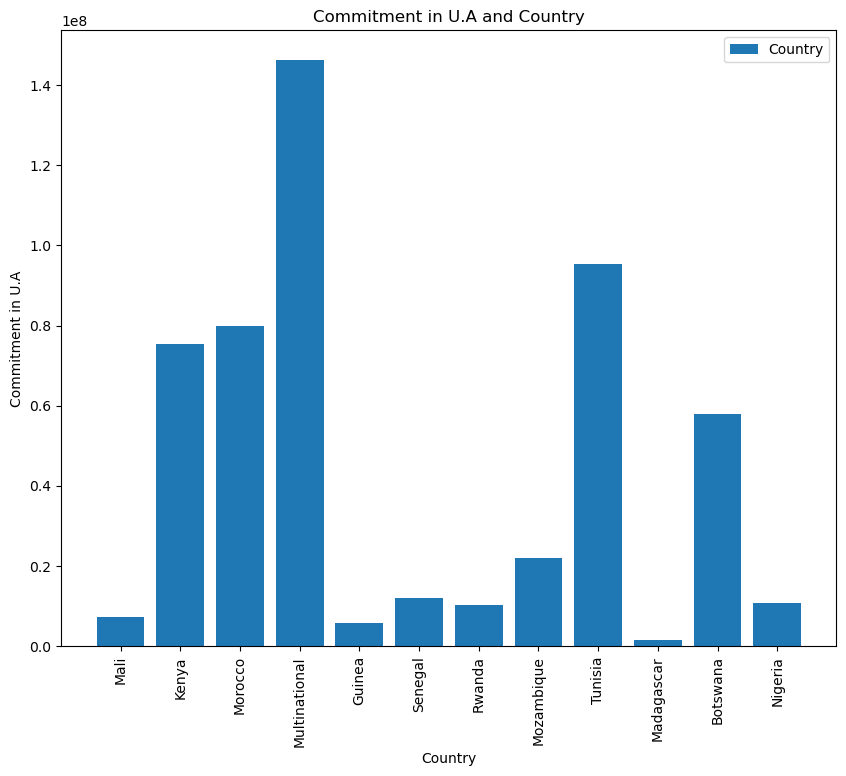

In [26]:
plt.figure(figsize=(10,8))
plt.bar(df2['Country'],df2['Commitment in U.A'], label='Country')
plt.xticks(rotation=90)
plt.title("Commitment in U.A and Country")
plt.xlabel('Country')
plt.ylabel('Commitment in U.A')
plt.legend()
plt.show()

From Graph then Multinational is the greater of Commitment in U.A and Madagascar is Smaller

<Axes: xlabel='Country', ylabel='Commitment in U.A'>

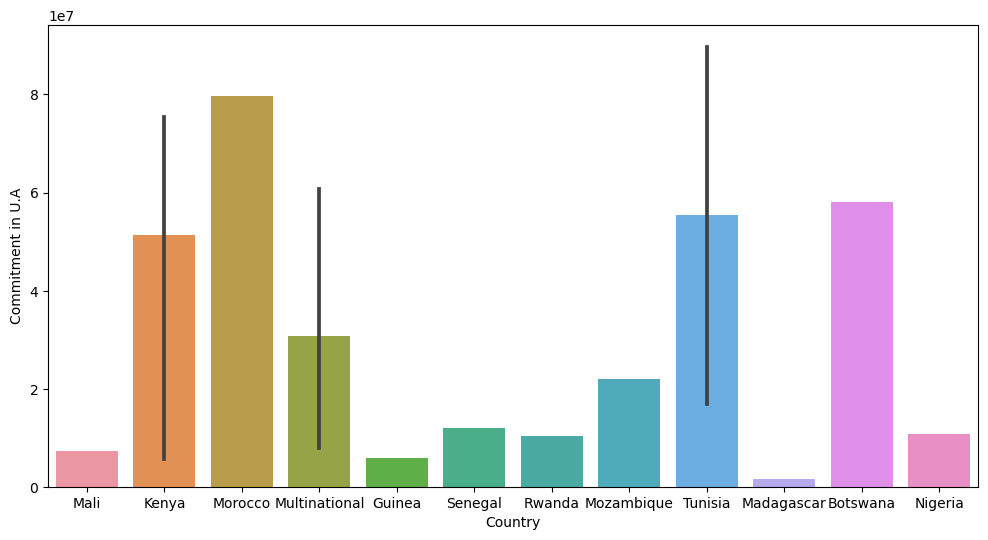

In [30]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Country', y='Commitment in U.A', data=df2)

# Conclusion: 
**we can notice that Multinational investors invest in a lot of projects, this can deceive us and make us say that they are in the first place, but when we look at the total amount of investments we notice that Morocco, Botswana, Tunisia, and Kenya has more investments, and this is the final result of our Analysis**